# Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import results

In [34]:
df = pd.read_csv("Results/Total_score.csv", index_col=0)
df.head()

,Full Text,Generated Text,Actual Text,Finetune,Category,Rouge-1,Rouge-2,Rouge-l,BERTscore
0,Peugeot deal boosts Mitsubishi Struggling Japa...,Japanese car maker Mitsubishi Motors has struc...,Struggling Japanese car maker Mitsubishi Motor...,business,business,0.638037,0.567568,0.638037,0.573879
1,Japan bank shares up on link talk Shares of Su...,"SMFG shares climbed by 2.7% to 717,000, and Da...","Shares of Sumitomo Mitsui Financial (SMFG), an...",business,business,0.608108,0.438202,0.594595,0.511145
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,"Mr Ebbers has denied all the charges, saying h...",Mr Sullivan is at the centre of the government...,business,business,0.589041,0.510000,0.575342,0.498677
3,Barclays shares up on merger talk Shares in UK...,Shares in UK banking group Barclays have risen...,Shares in UK banking group Barclays have risen...,business,business,0.715152,0.691244,0.715152,0.632184
4,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,The company should now be able put this disput...,business,business,0.907895,0.874419,0.907895,0.796049


# Create a dictionary for each Finetune dataset and Testing dataset

In [83]:
score_list = ['Rouge-1','Rouge-2','Rouge-l','BERTscore']
Sum_score_dict = {}
# Sum_score_dict.keys = score_list
for score in score_list:
    df_mean = df.groupby(['Finetune', 'Category']).agg({score: ['mean']})
    df_mean = df_mean.pivot_table(score, ['Finetune'], 'Category')
    df_mean = df_mean.droplevel(0, axis=1)
    Sum_score_dict[score] = df_mean
df_mean.head()


Category,Mixed,business,entertainment,politics,sport,tech
Finetune,,,,,,
Mixed,0.551812,0.588823,0.577647,0.489123,0.521240,0.561891
business,0.515950,0.558997,0.546102,0.487817,0.514656,0.506448
entertainment,0.524021,0.542703,0.605194,0.456352,0.507982,0.493353
politics,0.548226,0.601214,0.542794,0.532229,0.508551,0.510182
sport,0.548689,0.565568,0.561628,0.449704,0.536579,0.503763


# Heatmap plot

In [62]:
def plot_heatmap(dict, key):
    sns.set(rc={'figure.figsize':(10, 8)})
    ax = sns.heatmap(dict[key], annot=True, cmap="YlGnBu", fmt='.3g')
    plt.yticks(rotation=0)
    ax.xaxis.tick_top()
    plt.tick_params(top = False)
    ax.xaxis.set_label_position('top')
    plt.title(key, y=-.08, fontsize=20)
    plt.show()

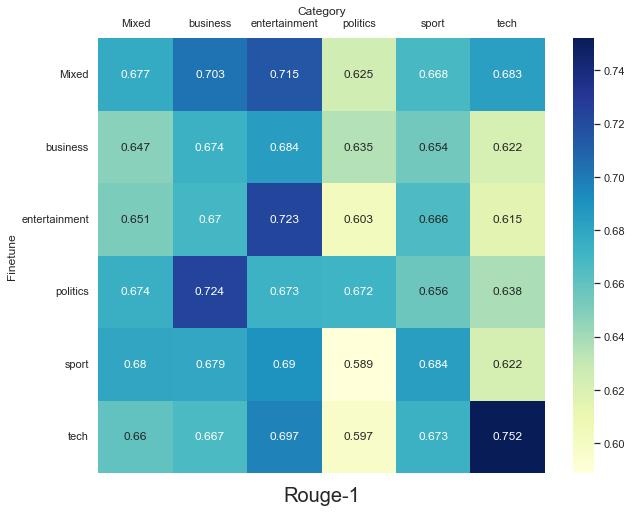

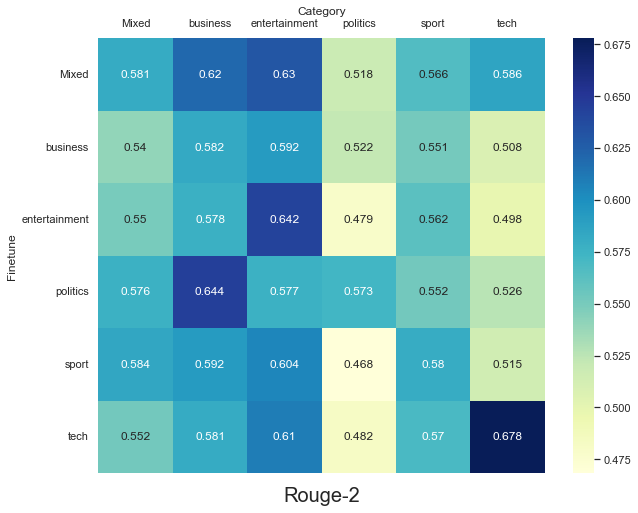

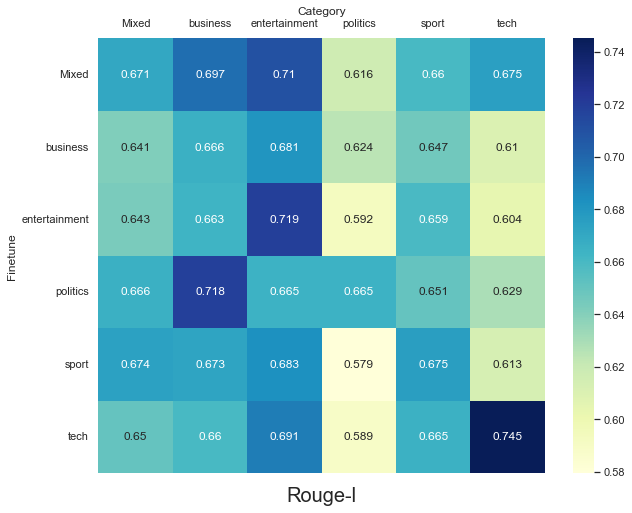

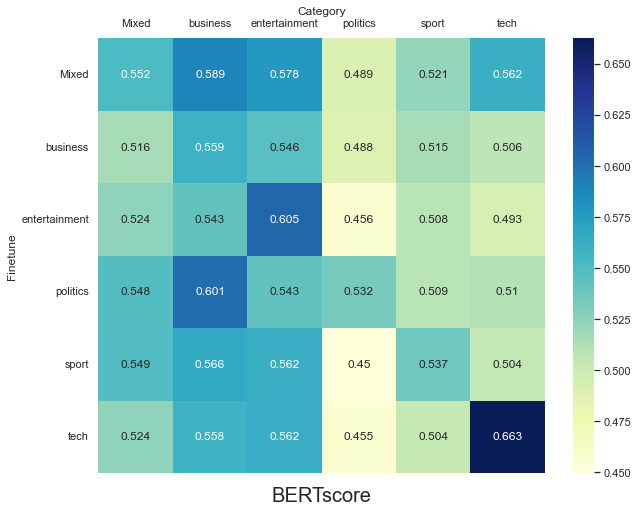

In [63]:
for score in score_list:
    plot_heatmap(Sum_score_dict, score)

In [64]:
# df_mean.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '20px'})

# Boxplot plot

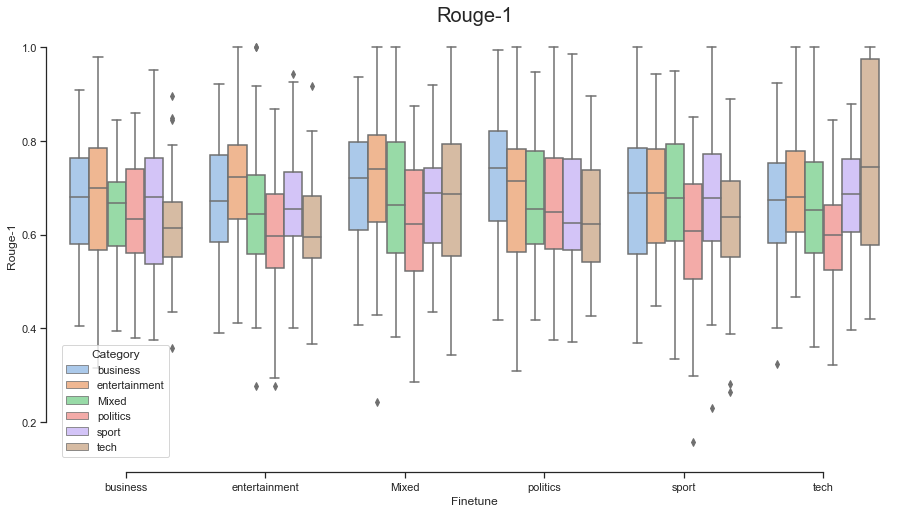

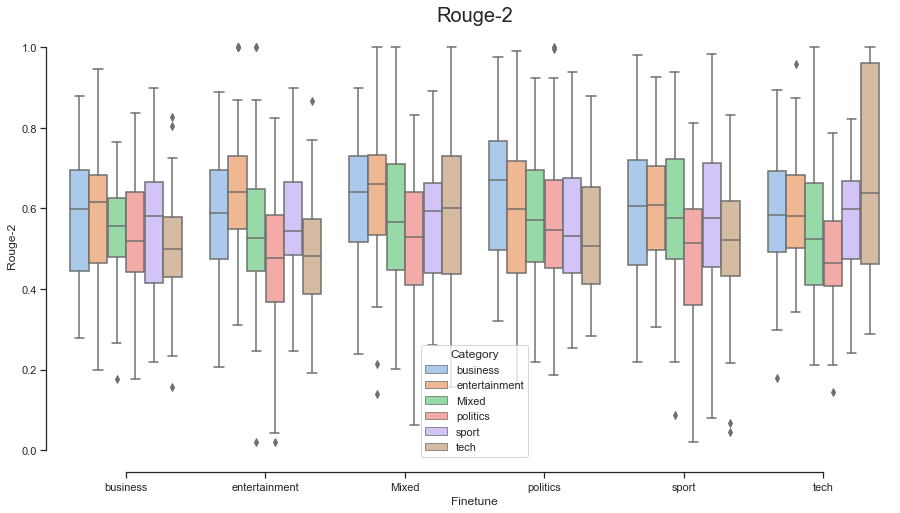

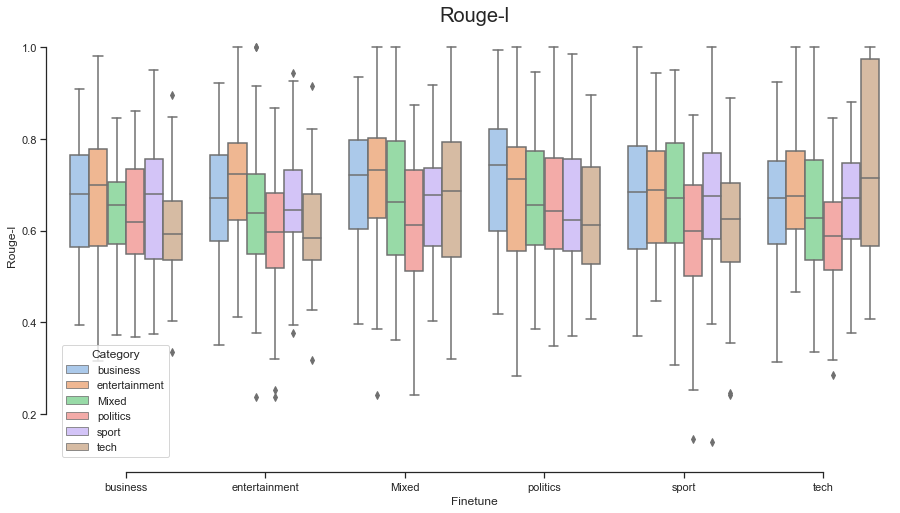

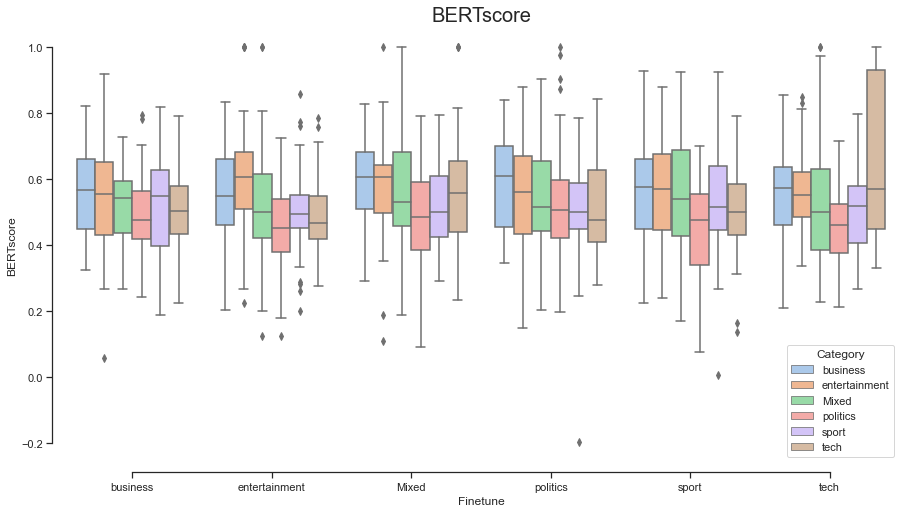

In [80]:
for score in score_list:
    sns.set(rc={'figure.figsize':(15, 8)})
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(x="Finetune", y=score,
                hue="Category",
                data=df)
    sns.despine(offset=10, trim=True)
    plt.title(score, fontsize=20)
    plt.show()